<a href="https://colab.research.google.com/github/ashiqurrahmankhan21st/ABC_Paper_2/blob/main/ABC_Paper_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sdv.single_table import TVAESynthesizer
from sdv.metadata import SingleTableMetadata

import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense

from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

In [21]:
#!pip install sdv
#!pip install --upgrade urllib3==1.26.7 # required version for svd

# Importing Data

In [58]:
data = pd.read_csv('https://raw.githubusercontent.com/ashiqurrahmankhan21st/TOPSIS/main/d17008_Iqbal_pdf.csv')
del data['Item']
data.head()

,Annual Requirement,Average Unit Cost (Dollars),Lead Time (Weeks)
0,120000,2.21,8
1,113544,25.32,6
2,96000,2.21,8
3,89600,2.49,12
4,77612,53.67,12


In [59]:
data

,Annual Requirement,Average Unit Cost (Dollars),Lead Time (Weeks)
0,120000,2.21,8
1,113544,25.32,6
2,96000,2.21,8
3,89600,2.49,12
4,77612,53.67,12
...,...,...,...
95,3708,36.36,4
96,4000,2.04,8
97,4000,3.66,7
98,4000,3.66,6


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Annual Requirement           100 non-null    int64  
 1   Average Unit Cost (Dollars)  100 non-null    float64
 2   Lead Time (Weeks)            100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [61]:
syndata = data.copy()
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=syndata)

synthesizer = TVAESynthesizer(
      metadata, # required
      enforce_min_max_values=True,
      enforce_rounding=False,
      epochs=500)

synthesizer.fit(syndata)

synthetic_data = synthesizer.sample(num_rows=1000)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(


In [62]:
synthetic_data

,Annual Requirement,Average Unit Cost (Dollars),Lead Time (Weeks)
0,9453,12.975195,6
1,7838,5.804761,8
2,5099,52.623294,8
3,5158,3.603595,5
4,3708,57.175470,10
...,...,...,...
995,8109,7.941587,6
996,7564,3.323081,6
997,9321,69.985442,11
998,3708,6.264915,9


In [63]:
pm = pd.DataFrame({
    " ":["Annual Requirement", "Average Unit Cost (Dollars)", "Lead Time (Weeks)"],
    "Annual Requirement"         :[1  ,   3,   2],
    "Average Unit Cost (Dollars)":[1/3,   1, 2/5],
    "Lead Time (Weeks)"          :[1/2, 3/5,   1]
})
pm = pm.set_index(' ')
pm = pm.T
pm

,Annual Requirement,Average Unit Cost (Dollars),Lead Time (Weeks)
Annual Requirement,1.000000,3.0,2.0
Average Unit Cost (Dollars),0.333333,1.0,0.4
Lead Time (Weeks),0.500000,0.6,1.0


# MCDM

# AHP

In [64]:
d_m = pm.copy() #pd.read_csv('https://raw.githubusercontent.com/ashiqurrahmankhan21st/thesisIE/master/pairWiseMatrix.csv',index_col=0)

for i in range(len(d_m)):
    d_m.iloc[:,i]=d_m.iloc[:,i]/d_m.iloc[:,i].sum()

d_m['criteria_weight'] = d_m.mean(axis=1)

dmat = pm.copy() #pd.read_csv('../input/pairwise/pairWiseMatrix.csv',index_col=0)

for i in range(len(d_m)):
    dmat.iloc[:,i] = dmat.iloc[:,i] * d_m.iloc[i,len(d_m)]

dmat['weighted_sum_value'] = dmat.sum(axis=1)

dmat['weighted_sum_value/criteria_weight'] = dmat['weighted_sum_value']/d_m['criteria_weight']

lamda = dmat['weighted_sum_value/criteria_weight'].mean()
r = len(d_m.index)
CI = (lamda-r)/(r-1)
k= pd.read_csv('https://raw.githubusercontent.com/ashiqurrahmankhan21st/thesisIE/master/RCI.csv')
for i in range(15):
    if i==r-1:
        RI=k.iloc[i,1]

CR=CI/RI

if CR < 0.1:
    print("The Matrix is Consistent.")
else:
     print("The Matrix is In-Consistent.")

The Matrix is Consistent.


13.3 % -> A: 133
24.5 % -> B: 245
62.2 % -> C: 622
Total:  1000


,Annual Requirement,Average Unit Cost (Dollars),Lead Time (Weeks),performance,RunCumCost,RunCostPerc,Rank,RunItemCum,RunItemPerc,Class
0,9453,12.975195,6,0.384946,205.879100,65.695157,757.0,286903.0,57.323277,B
1,7838,5.804761,8,0.336937,139.875013,44.633529,574.0,165025.0,32.972028,C
2,5099,52.623294,8,0.248147,54.397601,17.358046,288.0,41616.0,8.314885,C
3,5158,3.603595,5,0.389962,210.141396,67.055237,768.0,295296.0,59.000200,B
4,3708,57.175470,10,0.184669,19.111753,6.098480,126.0,8001.0,1.598601,C


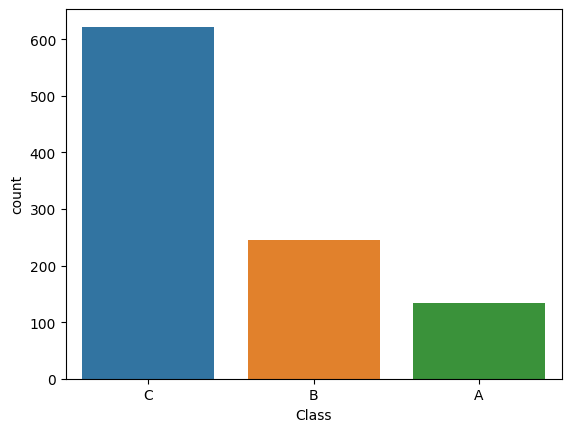

In [65]:
dn = 0
#dn = data.copy()
dn = synthetic_data.copy()
d1 = dn.copy()

d2 = pd.DataFrame(columns = d1.columns)
d2 = d2.T
d2["max"] = 0
d2["min"] = 0
d2 = d2.T

for i in range(len(d2.columns)):
    d2.iloc[0,i] = d1.iloc[:,i].max()
    d2.iloc[1,i] = d1.iloc[:,i].min()

# max-min normalizer = 0
# linear normalizer = 1
normalizer = 0

if normalizer == 0 :
    for i in range(len(d1.columns)):
        if i==1 or i==2: #Non Beneficial, lower value is desired, lower value is ideal best, higher value is ideal worst
            d1.iloc[:,i] = (d2.iloc[0,i]-d1.iloc[:,i])/(d2.iloc[0,i] - d2.iloc[1,i])

        else: #Beneficial, higher value is desired, higher value is ideal best, lower value is ideal worst
            d1.iloc[:,i] = (d1.iloc[:,i]-d2.iloc[1,i])/(d2.iloc[0,i] - d2.iloc[1,i])

else:
    for i in range(len(d1.columns)):
        if i==0 or i==3: #Non Beneficial
            d1.iloc[:,i] = d2.iloc[1,i]/d1.iloc[:,i]

        else: #Beneficial
            d1.iloc[:,i] = d1.iloc[:,i]/ d2.iloc[0,i]

w = np.array(d_m["criteria_weight"]).reshape(1,len(d_m))
d1 = d1*w

d1['performance'] = d1.iloc[:].sum(axis=1)

dn['performance'] = d1['performance']
dn = dn.sort_values(by=['performance'], ascending=True)

dn['RunCumCost']   = dn['performance'].cumsum()
TotSum             = dn['performance'].sum()
dn['RunCostPerc']  = (dn['RunCumCost']/TotSum)*100

dn['Rank']         = dn['RunCostPerc'].rank()
dn['RunItemCum']   = dn['Rank'].cumsum()
TotItemSum         = dn['Rank'].sum()
dn['RunItemPerc']  = (dn['RunItemCum']/TotItemSum)*100

def ABC_segmentation(perc):
    '''
    top A - top 20%, C - last 50% and B - between A & C

    '''
    if perc > 80 :
        return 'A'
    elif perc >= 50 and perc <= 80:
        return 'B'
    elif perc < 50:
        return 'C'

dn['Class'] = dn['RunCostPerc'].apply(ABC_segmentation)

ax = sns.countplot(x = dn['Class'],data = dn,label= 'Count')
dn['Class'].value_counts()

dn['productid'] = dn.index
dn = dn.sort_values(by=['productid'], ascending=True)
del dn['productid']
AHP_Class = dn['Class']

C,B,A = dn['Class'].value_counts()
print(round(100*A/dn['Class'].value_counts().sum(),2),"% ->","A:",A)
print(round(100*B/dn['Class'].value_counts().sum(),2),"% ->","B:",B)
print(round(100*C/dn['Class'].value_counts().sum(),2),"% ->","C:",C)
print("Total: ",dn['Class'].value_counts().sum())
dn.head()

# SAW

13.9 % -> A: 139
24.5 % -> B: 245
61.6 % -> C: 616
Total:  1000


,Annual Requirement,Average Unit Cost (Dollars),Lead Time (Weeks),performance,RunCumCost,RunCostPerc,Class
0,9453,12.975195,6,0.595058,345.062643,75.562582,B
1,7838,5.804761,8,0.540478,272.043429,59.572673,B
2,5099,52.623294,8,0.398118,100.391488,21.983950,C
3,5158,3.603595,5,0.637597,388.838365,85.148687,A
4,3708,57.175470,10,0.311642,49.795140,10.904250,C


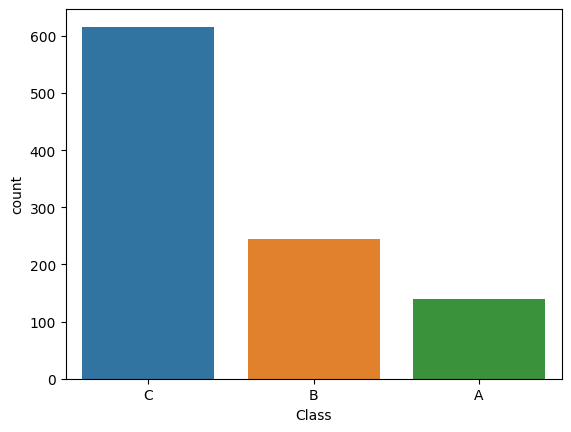

In [66]:
dn = 0
#dn = data.copy()
dn = synthetic_data.copy()
d1 = dn.copy()

d2 = pd.DataFrame(columns = d1.columns)
d2 = d2.T
d2["max"] = 0
d2["min"] = 0
d2 = d2.T

for i in range(len(d2.columns)):
    d2.iloc[0,i] = d1.iloc[:,i].max()
    d2.iloc[1,i] = d1.iloc[:,i].min()

# max-min normalizer = 0
# linear normalizer = 1
normalizer = 0

if normalizer == 0 :
    for i in range(len(d1.columns)):
        if i==1 or i==2: #Non Beneficial
            d1.iloc[:,i] = (d2.iloc[0,i]-d1.iloc[:,i])/(d2.iloc[0,i] - d2.iloc[1,i])

        else: #Beneficial
            d1.iloc[:,i] = (d1.iloc[:,i]-d2.iloc[1,i])/(d2.iloc[0,i] - d2.iloc[1,i])

else:
    for i in range(len(d1.columns)):
        if i==0 or i==3: #Non Beneficial
            d1.iloc[:,i] = d2.iloc[1,i]/d1.iloc[:,i]

        else: #Beneficial
            d1.iloc[:,i] = d1.iloc[:,i]/ d2.iloc[0,i]

w  = [0.33, 0.33, 0.34]
d1 = d1*w

d1['performance'] = d1.iloc[:].sum(axis=1)

dn['performance'] = d1['performance']
dn = dn.sort_values(by=['performance'], ascending=True)

dn['RunCumCost']   = dn['performance'].cumsum()
TotSum             = dn['performance'].sum()
dn['RunCostPerc']  = (dn['RunCumCost']/TotSum)*100

def ABC_segmentation(perc):
    '''
    top A - top 20%, C - last 50% and B - between A & C

    '''
    if perc > 80 :
        return 'A'
    elif perc >= 50 and perc <= 80:
        return 'B'
    elif perc < 50:
        return 'C'

dn['Class'] = dn['RunCostPerc'].apply(ABC_segmentation)

ax = sns.countplot(x = dn['Class'],data = dn,label= 'Count')
dn['Class'].value_counts()

dn['productid'] = dn.index
dn = dn.sort_values(by=['productid'], ascending=True)
del dn['productid']

SAW_Class = dn['Class']

C,B,A = dn['Class'].value_counts()
print(round(100*A/dn['Class'].value_counts().sum(),2),"% ->","A:",A)
print(round(100*B/dn['Class'].value_counts().sum(),2),"% ->","B:",B)
print(round(100*C/dn['Class'].value_counts().sum(),2),"% ->","C:",C)
print("Total: ",dn['Class'].value_counts().sum())
dn.head()

# VIKOR

10.6 % -> A: 106
18.8 % -> B: 188
70.6 % -> C: 706
Total:  1000


,Annual Requirement,Average Unit Cost (Dollars),Lead Time (Weeks),qi,RunCumCost,RunCostPerc,Rank,RunItemCum,RunItemPerc,Class
0,9453,12.975195,6,0.620082,553.174459,79.656858,737.0,271953.0,54.336264,B
1,7838,5.804761,8,0.670747,443.759422,63.901145,567.0,161028.0,32.173427,C
2,5099,52.623294,8,0.790380,213.104135,30.686894,249.0,31125.0,6.218781,C
3,5158,3.603595,5,0.627769,531.961107,76.602146,703.0,247456.0,49.441758,C
4,3708,57.175470,10,0.860733,97.039408,13.973628,108.0,5886.0,1.176024,C


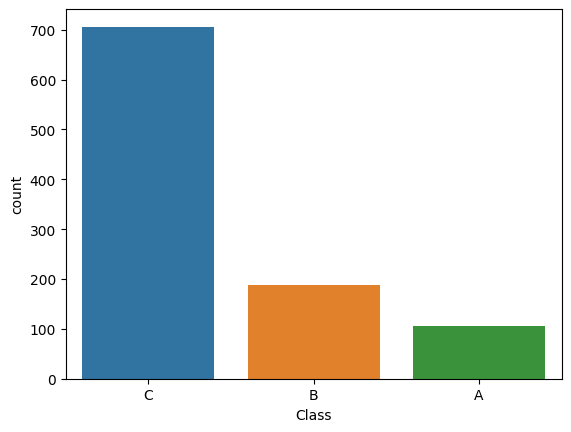

In [67]:
dn = 0
#dn = data.copy() #pd.read_csv('file:///home/shatiil/shatiil/DataScience/Thesis/1.DATA/dumy10000.csv')
dn = synthetic_data.copy()
d1 = dn.copy()

d2 = pd.DataFrame(columns = d1.columns)
d2 = d2.T
d2["max"] = 0
d2["min"] = 0
d2 = d2.T

for i in range(len(d2.columns)):
    d2.iloc[0,i] = d1.iloc[:,i].max()
    d2.iloc[1,i] = d1.iloc[:,i].min()

# max-min normalizer = 0
# linear normalizer = 1
normalizer = 0

if normalizer == 0 :
    for i in range(len(d1.columns)):
        if i==0 or i==3: #Non Beneficial
            d1.iloc[:,i] = (d2.iloc[0,i]-d1.iloc[:,i])/(d2.iloc[0,i] - d2.iloc[1,i])

        else: #Beneficial
            d1.iloc[:,i] = (d1.iloc[:,i]-d2.iloc[1,i])/(d2.iloc[0,i] - d2.iloc[1,i])

else:
    for i in range(len(d1.columns)):
        if i==0 or i==3: #Non Beneficial
            d1.iloc[:,i] = d2.iloc[1,i]/d1.iloc[:,i]

        else: #Beneficial
            d1.iloc[:,i] = d1.iloc[:,i]/ d2.iloc[0,i]

w  = [0.33, 0.33, 0.34]
d1 = d1*w

d1['si'] = d1.iloc[:].sum(axis=1)

d1['ri'] = d1.iloc[:,0:-2].max(axis=1)

s_best  = d1['si'].min()
s_worst = d1['si'].max()
r_best  = d1['ri'].min()
r_worst = d1['ri'].max()
neu = 0.5

d1['qi'] = d1.apply(lambda row: neu*((row.si-s_best)/(s_worst-s_best))+(1-neu)*((row.ri-r_best)/(r_worst-r_best)) , axis =1 )

dn['qi'] = d1['qi']

dn = dn.sort_values(by=['qi'], ascending=False)

dn['RunCumCost']   = dn['qi'].cumsum()
TotSum             = dn['qi'].sum()
dn['RunCostPerc']  = (dn['RunCumCost']/TotSum)*100

dn['Rank']         = dn['RunCostPerc'].rank()
dn['RunItemCum']   = dn['Rank'].cumsum()
TotItemSum         = dn['Rank'].sum()
dn['RunItemPerc']  = (dn['RunItemCum']/TotItemSum)*100

def ABC_segmentation(perc):
    '''
    top A - top 20%, C - last 50% and B - between A & C

    '''
    if perc > 80 :
        return 'A'
    elif perc >= 50 and perc <= 80:
        return 'B'
    elif perc < 50:
        return 'C'

dn['Class'] = dn['RunItemPerc'].apply(ABC_segmentation)

ax = sns.countplot(x = dn['Class'],data = dn,label= 'Count')
dn['Class'].value_counts()

dn['productid'] = dn.index
dn = dn.sort_values(by=['productid'], ascending=True)
del dn['productid']
VIKOR_Class = dn['Class']

C,B,A = dn['Class'].value_counts()
print(round(100*A/dn['Class'].value_counts().sum(),2),"% ->","A:",A)
print(round(100*B/dn['Class'].value_counts().sum(),2),"% ->","B:",B)
print(round(100*C/dn['Class'].value_counts().sum(),2),"% ->","C:",C)
print("Total: ",dn['Class'].value_counts().sum())
dn.head()

13.4  % -> A: 134
24.6 % -> B: 246
62.0 % -> C: 620
Total:  1000


,Annual Requirement,Average Unit Cost (Dollars),Lead Time (Weeks),p,RunCumCost,RunCostPerc,Class
0,9453,12.975195,6,0.046295,26.001683,60.755038,C
1,7838,5.804761,8,0.049195,20.890919,48.813324,B
2,5099,52.623294,8,0.053984,11.804262,27.581613,B
3,5158,3.603595,5,0.053883,12.019842,28.085335,B
4,3708,57.175470,10,0.056358,5.246560,12.259011,A


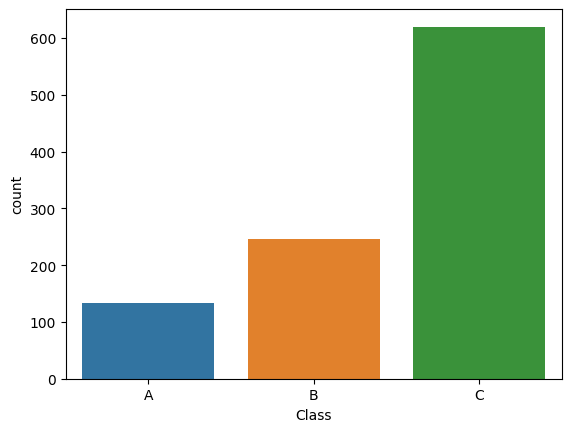

In [68]:
def TOPSIS(df):
  w = []
  for i in range(len(df.columns)):
    w.append(1/len(df.columns))


  nb = pd.DataFrame({
      "V+": np.zeros(len(df.columns)), # ideal best
      "V-": np.zeros(len(df.columns))  # ideal worst
  }).T

  dff = df.copy()
  d_f = df.copy()
  dff.head()

  w = [0.60, 0.2, 0.2]#w = [.50,.40,.10]

  for i in range(len(df.columns)):
      dff.iloc[:,i] = (df.iloc[:,i] / np.sqrt(( df.iloc[:,0] ** 2 ).sum())) * w[i]
      if i == 1 or i == 2: # non-benificial, lower value is desired, lower value is ideal best, higher value is ideal worst

          nb.iloc[0,i] = dff.iloc[:,i].min() #non-benificial - lower value ideal best
          nb.iloc[1,i] = dff.iloc[:,i].max() #non-benificial - higher value ideal worst


      else:                   # benificial, higher value is desired, higher value is ideal best, lower value is ideal worst

          nb.iloc[0,i] = dff.iloc[:,i].max() #benificial - higher value ideal best
          nb.iloc[1,i] = dff.iloc[:,i].min() #benificial - lower value ideal worst

  nb.columns = df.columns

  temp1 = dff.copy()
  temp2 = dff.copy()

  for i in range(len(df.columns)):
      temp1.iloc[:,i] = (temp1.iloc[:,i] - nb.iloc[0,i]) ** 2


  for i in range(len(df.columns)):
      temp2.iloc[:,i] = (temp1.iloc[:,i] - nb.iloc[1,i]) ** 2


  dff['S+'] = 0
  dff['S-'] = 0

  for i in range(len(df)):
      dff.iloc[i,-2] = np.sqrt(temp1.iloc[i,:].sum(axis = 0))
      dff.iloc[i,-1] = np.sqrt(temp2.iloc[i,:].sum(axis = 0))


  dff['S+ + S-'] = 0
  dff['p'] = 0

  dff['S+ + S-'] = dff['S+'] + dff['S-']

  dff['p'] = dff['S-'] / dff['S+ + S-']

  d_f['p'] = dff['p']
  d_f = d_f.sort_values(by='p', ascending=False) # heighest P value has the top rank

  d_f['RunCumCost'] = d_f['p'].cumsum()
  TotSum = d_f['p'].sum()
  d_f['RunCostPerc'] = (d_f['RunCumCost']/TotSum)*100

  def ABC_segmentation(perc):

  #top A - top 20%, C - last 50% and B - between A & C

      if perc <=20 :
          return 'A'
      elif perc > 20 and perc < 50:
          return 'B'
      elif perc >= 50:
          return 'C'

  d_f['Class'] = d_f['RunCostPerc'].apply(ABC_segmentation)
  ax = sns.countplot(x = d_f['Class'],data = d_f,label= 'Count')

  d_f['Class'].value_counts()

  d_f['productid'] = d_f.index
  d_f = d_f.sort_values(by=['productid'], ascending=True)
  del d_f['productid']

  return d_f

d_f = TOPSIS(synthetic_data.copy())
TOPSIS_Class = d_f['Class']
C,B,A = d_f['Class'].value_counts()
print(round(100*A/d_f['Class'].value_counts().sum(),2)," % ->","A:",A)
print(round(100*B/d_f['Class'].value_counts().sum(),2),"% ->","B:",B)
print(round(100*C/d_f['Class'].value_counts().sum(),2),"% ->","C:",C)
print("Total: ",d_f['Class'].value_counts().sum())
d_f.head()

# Best Worst

In [69]:
#1,3,5
#5
#2
#1
#0.65+ 0.225+ 0.125

13.2 % -> A: 132
24.7 % -> B: 247
62.1 % -> C: 621
Total:  1000


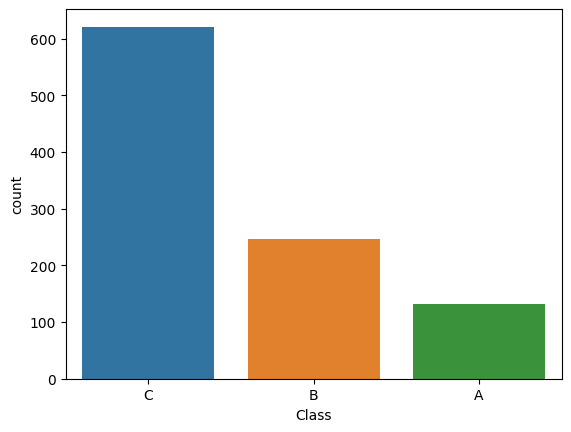

In [70]:
def BWM(data):
  dn = 0
  dn = data.copy()
  d1 = dn.copy()

  d2 = pd.DataFrame(columns = d1.columns)
  d2 = d2.T
  d2["max"] = 0
  d2["min"] = 0
  d2 = d2.T

  for i in range(len(d2.columns)):
      d2.iloc[0,i] = d1.iloc[:,i].max()
      d2.iloc[1,i] = d1.iloc[:,i].min()

  # max-min normalizer = 0
  # linear normalizer = 1
  normalizer = 0

  if normalizer == 0 :
      for i in range(len(d1.columns)):
          if i==1 or i==2: #Non Beneficial
              d1.iloc[:,i] = (d2.iloc[0,i]-d1.iloc[:,i])/(d2.iloc[0,i] - d2.iloc[1,i])

          else: #Beneficial
              d1.iloc[:,i] = (d1.iloc[:,i]-d2.iloc[1,i])/(d2.iloc[0,i] - d2.iloc[1,i])

  else:
      for i in range(len(d1.columns)):
          if i==0 or i==3: #Non Beneficial
              d1.iloc[:,i] = d2.iloc[1,i]/d1.iloc[:,i]

          else: #Beneficial
              d1.iloc[:,i] = d1.iloc[:,i]/ d2.iloc[0,i]

  w  = [0.65, 0.225, 0.125]
  d1 = d1*w

  d1['performance'] = d1.iloc[:].sum(axis=1)

  dn['performance'] = d1['performance']
  dn = dn.sort_values(by=['performance'], ascending=True)

  dn['RunCumCost']   = dn['performance'].cumsum()
  TotSum             = dn['performance'].sum()
  dn['RunCostPerc']  = (dn['RunCumCost']/TotSum)*100

  def ABC_segmentation(perc):
      '''
      top A - top 20%, C - last 50% and B - between A & C

      '''
      if perc > 80 :
          return 'A'
      elif perc >= 50 and perc <= 80:
          return 'B'
      elif perc < 50:
          return 'C'

  dn['Class'] = dn['RunCostPerc'].apply(ABC_segmentation)

  ax = sns.countplot(x = dn['Class'],data = dn,label= 'Count')
  dn['Class'].value_counts()

  dn['productid'] = dn.index
  dn = dn.sort_values(by=['productid'], ascending=True)
  del dn['productid']

  BWM_Class = dn['Class']

  C,B,A = dn['Class'].value_counts()
  print(round(100*A/dn['Class'].value_counts().sum(),2),"% ->","A:",A)
  print(round(100*B/dn['Class'].value_counts().sum(),2),"% ->","B:",B)
  print(round(100*C/dn['Class'].value_counts().sum(),2),"% ->","C:",C)
  print("Total: ",dn['Class'].value_counts().sum())
  dn.head()
  return BWM_Class

BWM_Class = BWM(synthetic_data.copy())

# COMBO

In [71]:
Data = {
        "AHP_Class"   : AHP_Class,
        "SAW_Class"   : SAW_Class,
        "VIKOR_Class" : VIKOR_Class,
        "TOPSIS_Class": TOPSIS_Class,
        "BWM_Class"   : BWM_Class
       }
combo = pd.DataFrame(Data)
combo

,AHP_Class,SAW_Class,VIKOR_Class,TOPSIS_Class,BWM_Class
0,B,B,B,C,B
1,C,B,C,B,C
2,C,C,C,B,C
3,B,A,C,B,B
4,C,C,C,A,C
...,...,...,...,...,...
995,B,B,B,C,B
996,B,A,B,B,B
997,C,C,C,C,C
998,C,C,C,A,C


In [72]:
combo['combo']=0
for i in range(len(combo)):
  test_list = list(combo.iloc[i,0:5])
  f = max(set(test_list), key = test_list.count) ##
  combo.iloc[i,5] = f
  test_list.sort()
  print(test_list,combo.iloc[i,5])

['B', 'B', 'B', 'B', 'C'] B
['B', 'B', 'C', 'C', 'C'] C
['B', 'C', 'C', 'C', 'C'] C
['A', 'B', 'B', 'B', 'C'] B
['A', 'C', 'C', 'C', 'C'] C
['B', 'B', 'C', 'C', 'C'] C
['B', 'C', 'C', 'C', 'C'] C
['C', 'C', 'C', 'C', 'C'] C
['B', 'B', 'B', 'B', 'C'] B
['B', 'B', 'B', 'B', 'C'] B
['B', 'C', 'C', 'C', 'C'] C
['C', 'C', 'C', 'C', 'C'] C
['B', 'B', 'C', 'C', 'C'] C
['B', 'B', 'C', 'C', 'C'] C
['B', 'C', 'C', 'C', 'C'] C
['A', 'A', 'A', 'B', 'C'] A
['A', 'C', 'C', 'C', 'C'] C
['A', 'C', 'C', 'C', 'C'] C
['B', 'C', 'C', 'C', 'C'] C
['B', 'C', 'C', 'C', 'C'] C
['C', 'C', 'C', 'C', 'C'] C
['C', 'C', 'C', 'C', 'C'] C
['A', 'A', 'A', 'A', 'C'] A
['A', 'A', 'A', 'B', 'C'] A
['A', 'C', 'C', 'C', 'C'] C
['B', 'B', 'C', 'C', 'C'] C
['A', 'B', 'B', 'B', 'C'] B
['B', 'C', 'C', 'C', 'C'] C
['B', 'B', 'B', 'B', 'C'] B
['B', 'B', 'C', 'C', 'C'] C
['C', 'C', 'C', 'C', 'C'] C
['C', 'C', 'C', 'C', 'C'] C
['B', 'C', 'C', 'C', 'C'] C
['A', 'C', 'C', 'C', 'C'] C
['A', 'A', 'B', 'C', 'C'] A
['C', 'C', 'C', 'C',

In [73]:
combo['combo'].value_counts()

C    651
B    215
A    134
Name: combo, dtype: int64

In [74]:
combo.head()

,AHP_Class,SAW_Class,VIKOR_Class,TOPSIS_Class,BWM_Class,combo
0,B,B,B,C,B,B
1,C,B,C,B,C,C
2,C,C,C,B,C,C
3,B,A,C,B,B,B
4,C,C,C,A,C,C


In [75]:
dn.head()

,Annual Requirement,Average Unit Cost (Dollars),Lead Time (Weeks),qi,RunCumCost,RunCostPerc,Rank,RunItemCum,RunItemPerc,Class
0,9453,12.975195,6,0.620082,553.174459,79.656858,737.0,271953.0,54.336264,B
1,7838,5.804761,8,0.670747,443.759422,63.901145,567.0,161028.0,32.173427,C
2,5099,52.623294,8,0.790380,213.104135,30.686894,249.0,31125.0,6.218781,C
3,5158,3.603595,5,0.627769,531.961107,76.602146,703.0,247456.0,49.441758,C
4,3708,57.175470,10,0.860733,97.039408,13.973628,108.0,5886.0,1.176024,C


In [78]:
dn = 0
dn = synthetic_data.copy()
dn['ComboClass'] = combo['combo'].copy()
dn['ComboClass'] = combo['AHP_Class'].copy()
dn['SAW_Class'] = combo['SAW_Class'].copy()
dn['VIKOR_Class'] = combo['VIKOR_Class'].copy()
dn['TOPSIS_Class'] = combo['TOPSIS_Class'].copy()
dn['BWM_Class'] = combo['BWM_Class'].copy()
#del dn['Unnamed: 0']
dn.head()

,Annual Requirement,Average Unit Cost (Dollars),Lead Time (Weeks),ComboClass,SAW_Class,VIKOR_Class,TOPSIS_Class,BWM_Class
0,9453,12.975195,6,B,B,B,C,B
1,7838,5.804761,8,C,B,C,B,C
2,5099,52.623294,8,C,C,C,B,C
3,5158,3.603595,5,B,A,C,B,B
4,3708,57.175470,10,C,C,C,A,C


In [79]:
dn.to_csv("MyNewPaperSytheticData.csv")

In [77]:
***

SyntaxError: ignored

# Machine Learning

In [39]:
iteration = 5
row_col = np.zeros([iteration,])

acc = pd.DataFrame()
acc['train_Acc'] = row_col
acc['test_Acc']  = row_col
acc['time']      = row_col
acc['test_size'] = row_col
start_time  = 0
end_time    = 0
train_score = 0
test_score  = 0

#split_size
n = .1

# ANN

In [40]:
iteration = 5
for i in range(iteration):

    X = dn.drop(columns=['ComboClass']).astype('float32')
    y = dn['ComboClass'] #.iloc[0:100,-1]

    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)

    y = to_categorical(y)

    X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size = 0.2, random_state=0)
    #X_train,X_val,y_train,y_val = train_test_split(X_train, y_train ,test_size = .1, random_state=0)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test  = sc.fit_transform(X_test)
    #X_val  = sc.fit_transform(X_val)

    #time start
    start_time = time.time()

    model = Sequential()
    model.add(Dense(5, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train,y_train,batch_size = 64, epochs = 50)

    #time end
    end_time = time.time()

    train_score = model.evaluate(X_train,y_train,verbose=0)
    test_score = model.evaluate(X_test,y_test,verbose=0)

    #time calculation
    acc.iloc[i,2] = end_time - start_time

    #Accuracy
    acc.iloc[i,0] = train_score[1]
    acc.iloc[i,1] = train_score[1]

    #test size
    acc.iloc[i,3] = n*100

    if n == .1:
        n = .2
    else :
        n = .1

Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 0.9415 - accuracy: 0.6650
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.9012 - accuracy: 0.6687
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.8619 - accuracy: 0.6687
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.8242 - accuracy: 0.6687
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.7897 - accuracy: 0.6687
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.7583 - accuracy: 0.6687
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.7300 - accuracy: 0.6687
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.6687
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6687
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6687
Epoch 11/50
13/13 [

In [41]:
acc = acc.round(2)
acc

,train_Acc,test_Acc,time,test_size
0,0.83,0.83,3.62,10.0
1,0.83,0.83,3.26,20.0
2,0.86,0.86,3.23,10.0
3,0.79,0.79,2.36,20.0
4,0.83,0.83,3.61,10.0


In [42]:
ANNAcc = acc.mean()
ANNAcc

train_Acc     0.828
test_Acc      0.828
time          3.216
test_size    14.000
dtype: float64

# SVM

In [43]:
n = .1
for i in range(iteration):

    X = dn.drop(columns=['ComboClass']).astype('float32')
    y = dn['ComboClass'] #.iloc[0:100,-1]

    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)

    #y = to_categorical(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = n, random_state=0)

    #time start
    start_time = time.time()


    model = SVC(kernel='poly')
    model.fit(X_train,y_train)

    #time end
    end_time = time.time()

    train_score = model.score(X_train,y_train)
    test_score  = model.score(X_test,y_test)

    #time calculation
    acc.iloc[i,2] = end_time - start_time

    #Accuracy
    acc.iloc[i,0] = train_score
    acc.iloc[i,1] = test_score

    #test size
    acc.iloc[i,3] = n*100

    if n == .1:
        n = .2
    else :
        n = .1
    print(i+1," run")

1  run
2  run
3  run
4  run
5  run


In [44]:
acc = acc.round(2)
acc

,train_Acc,test_Acc,time,test_size
0,0.73,0.71,0.02,10.0
1,0.73,0.74,0.01,20.0
2,0.73,0.71,0.01,10.0
3,0.73,0.74,0.01,20.0
4,0.73,0.71,0.01,10.0


In [45]:
SVMAcc = acc.mean()
SVMAcc

train_Acc     0.730
test_Acc      0.722
time          0.012
test_size    14.000
dtype: float64

# KNN

In [46]:
n = .1
for i in range(iteration):

    X = dn.drop(columns=['ComboClass']).astype('float32')
    y = dn['ComboClass'] #.iloc[0:100,-1]

    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = n, random_state=0)


    #time start
    start_time = time.time()

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train,y_train)

    #time end
    end_time = time.time()

    train_score = model.score(X_train,y_train)
    test_score  = model.score(X_test,y_test)

    #time calculation
    acc.iloc[i,2] = end_time - start_time

    #Accuracy
    acc.iloc[i,0] = train_score
    acc.iloc[i,1] = test_score

    #test size
    acc.iloc[i,3] = n*100

    if n == .1:
        n = .2
    else :
        n = .1
    print(i+1," run")

1  run
2  run
3  run
4  run
5  run


In [47]:
acc = acc.round(2)
acc

,train_Acc,test_Acc,time,test_size
0,0.87,0.66,0.0,10.0
1,0.87,0.72,0.0,20.0
2,0.87,0.66,0.0,10.0
3,0.87,0.72,0.0,20.0
4,0.87,0.66,0.0,10.0


In [48]:
KNNAcc = acc.mean()
KNNAcc

train_Acc     0.870
test_Acc      0.684
time          0.000
test_size    14.000
dtype: float64

# GPC

In [49]:
n = .1
for i in range(iteration):

    X = dn.drop(columns=['ComboClass']).astype('float32')
    y = dn['ComboClass'] #.iloc[0:100,-1]

    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = n, random_state=0)


    #time start
    start_time = time.time()

    model = GaussianProcessClassifier(multi_class='one_vs_one')
    model.fit(X_train,y_train)

    #time end
    end_time = time.time()

    train_score = model.score(X_train,y_train)
    test_score  = model.score(X_test,y_test)

    #time calculation
    acc.iloc[i,2] = end_time - start_time

    #Accuracy
    acc.iloc[i,0] = train_score
    acc.iloc[i,1] = test_score

    #test size
    acc.iloc[i,3] = n*100

    if n == .1:
        n = .2
    else :
        n = .1
    print(i+1," run")

1  run
2  run
3  run
4  run
5  run


In [50]:
acc = acc.round(2)
acc

,train_Acc,test_Acc,time,test_size
0,1.0,0.68,0.73,10.0
1,1.0,0.70,0.60,20.0
2,1.0,0.68,0.66,10.0
3,1.0,0.70,0.91,20.0
4,1.0,0.68,0.59,10.0


In [51]:
GPCAcc = acc.mean()
GPCAcc

train_Acc     1.000
test_Acc      0.688
time          0.698
test_size    14.000
dtype: float64

In [52]:
performance = {
    "Performance" : ['Avg Train Accuracy','Avg Test Accuracy','Avg Run Time','Avg Test size'],
    "ANN"         : ANNAcc,
    "SVM"         : SVMAcc,
    "KNN"         : KNNAcc,
    "GPC"         : GPCAcc
}
Performance = pd.DataFrame(performance)
Performance = Performance.round(2)
Performance

,Performance,ANN,SVM,KNN,GPC
train_Acc,Avg Train Accuracy,0.83,0.73,0.87,1.00
test_Acc,Avg Test Accuracy,0.83,0.72,0.68,0.69
time,Avg Run Time,3.22,0.01,0.00,0.70
test_size,Avg Test size,14.00,14.00,14.00,14.00


In [53]:
#SAW
p1 = Performance.iloc[0:3,1:5].T
p2 = pd.DataFrame(columns = p1.columns)
p2 = p2.T
p2["max"] = 0
p2["min"] = 0
p2 = p2.T
for i in range(len(p2.columns)):
    p2.iloc[0,i] = p1.iloc[:,i].max()
    p2.iloc[1,i] = p1.iloc[:,i].min()

# max-min normalizer = 0
# linear normalizer = 1
normalizer = 0

if normalizer == 0 :
    for i in range(len(p1.columns)):
        if i==2: #Non Beneficial
            p1.iloc[:,i] = (p2.iloc[0,i]-p1.iloc[:,i])/(p2.iloc[0,i] - p2.iloc[1,i])
        else: #Beneficial
            p1.iloc[:,i] = (p1.iloc[:,i]-p2.iloc[1,i])/(p2.iloc[0,i] - p2.iloc[1,i])

else:
    for i in range(len(p1.columns)):
        if i==2: #Non Beneficial
            p1.iloc[:,i] = p2.iloc[1,i]/p1.iloc[:,i]

        else: #Beneficial
            p1.iloc[:,i] = p1.iloc[:,i]/ p2.iloc[0,i]

weight = np.array([0.4,0.4,0.2]).reshape(3,1)
p1["p-w"] = np.dot(p1,weight)
p1

,train_Acc,test_Acc,time,p-w
ANN,0.370370,1.000000,0.000000,0.548148
SVM,0.000000,0.266667,0.996894,0.306046
KNN,0.518519,0.000000,1.000000,0.407407
GPC,1.000000,0.066667,0.782609,0.583188


In [54]:
p1.round(2)

,train_Acc,test_Acc,time,p-w
ANN,0.37,1.00,0.00,0.55
SVM,0.00,0.27,1.00,0.31
KNN,0.52,0.00,1.00,0.41
GPC,1.00,0.07,0.78,0.58
